In [1]:
import random
import math

In [7]:
class BiasSVD():
    def __init__(self, rating_data, F=5, alpha=0.1, lmbda=0.1, max_iter=100):
        self.F = F          # 这个表示隐向量的维度
        self.P = dict()     # 用户矩阵P  大小是[users_num, F]
        self.Q = dict()     # 物品矩阵Q  大小是[item_nums, F]
        self.bu = dict()    # 用户偏置系数
        self.bi = dict()    # 物品偏置系数
        self.mu = 0         # 全局偏置系数
        self.alpha = alpha  # 学习率
        self.lmbda = lmbda  # 正则项系数
        self.max_iter = max_iter        # 最大迭代次数
        self.rating_data = rating_data  # 评分矩阵

        for user, items in self.rating_data.items():
            # 初始化矩阵P和Q, 随机数需要和1/sqrt(F)成正比
            self.P[user] = [random.random() / math.sqrt(self.F) for x in range(0, F)]
            self.bu[user] = 0
            for item, rating in items.items():
                if item not in self.Q:
                    self.Q[item] = [random.random() / math.sqrt(self.F) for x in range(0, F)]
                    self.bi[item] = 0

    # 训练模式
    # 采用随机梯度下降的方式训练模型参数
    def train(self):
        cnt, mu_sum = 0, 0
        for user, items in self.rating_data.items():
            for item, rui in items.items():
                mu_sum, cnt = mu_sum + rui, cnt + 1
        self.mu = mu_sum / cnt # 全局偏置系数（所有评分的平均值）

        for step in range(self.max_iter):
            # 遍历所有的用户及历史交互物品
            for user, items in self.rating_data.items():
                # 遍历历史交互物品
                for item, rui in items.items():
                    rhat_ui = self.predict(user, item)  # 评分预测
                    e_ui = rui - rhat_ui  # 评分预测偏差
                    # 实际评分：rui
                    # 预测评分：rhat_ui
                    # 预测偏差：e_ui

                    # 参数更新
                    self.bu[user] += self.alpha * (e_ui - self.lmbda * self.bu[user])
                    self.bi[item] += self.alpha * (e_ui - self.lmbda * self.bi[item])
                    for k in range(0, self.F):
                        self.P[user][k] += self.alpha * (e_ui * self.Q[item][k] - self.lmbda * self.P[user][k])
                        self.Q[item][k] += self.alpha * (e_ui * self.P[user][k] - self.lmbda * self.Q[item][k])
            # 逐步降低学习率，确保训练过程的稳定性
            self.alpha *= 0.1

    # 预测模式
    # 评分预测
    def predict(self, user, item):
        return sum(self.P[user][f] * self.Q[item][f] for f in range(0, self.F)) + self.bu[user] + self.bi[
            item] + self.mu


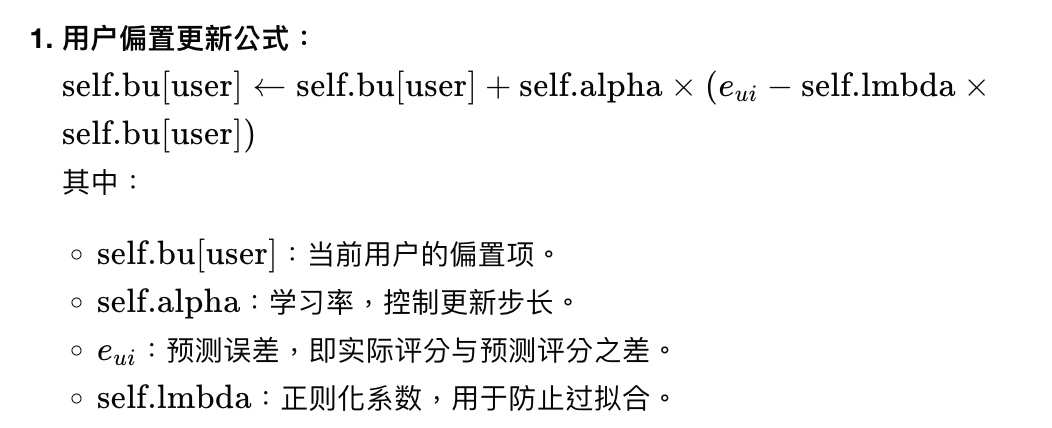

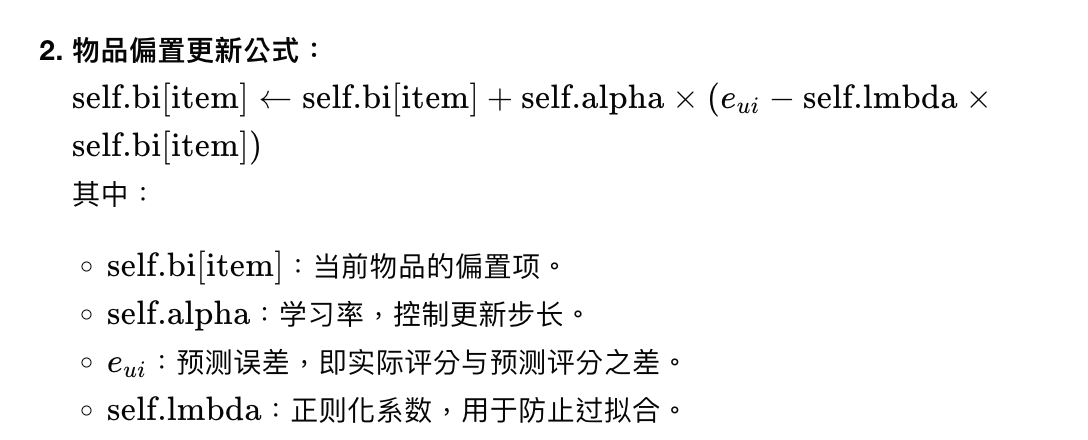

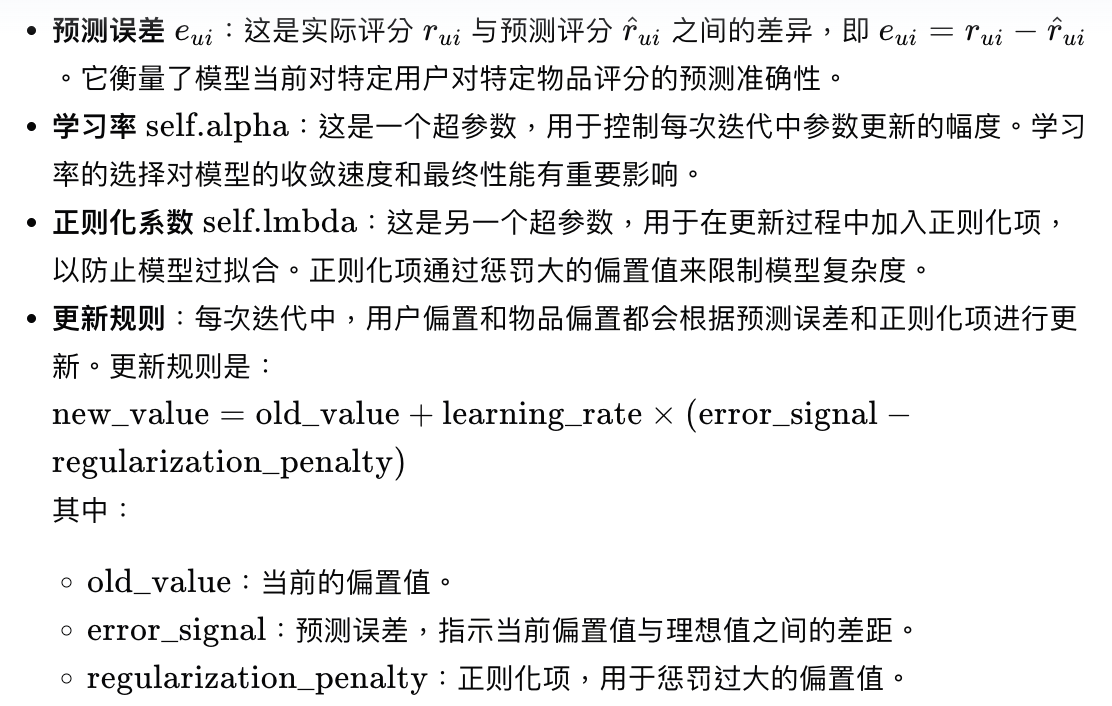

In [5]:
# 通过字典初始化训练样本，分别表示不同用户（1-5）对不同物品（A-E)的真实评分
def loadData():
    rating_data={1: {'A': 5, 'B': 3, 'C': 4, 'D': 4},
           2: {'A': 3, 'B': 1, 'C': 2, 'D': 3, 'E': 3},
           3: {'A': 4, 'B': 3, 'C': 4, 'D': 3, 'E': 5},
           4: {'A': 3, 'B': 3, 'C': 1, 'D': 5, 'E': 4},
           5: {'A': 1, 'B': 5, 'C': 5, 'D': 2, 'E': 1}
          }
    return rating_data


In [8]:
# 加载数据
rating_data = loadData()
# 建立模型
basicsvd = BiasSVD(rating_data, F=10)
# 参数训练
basicsvd.train()
# 预测用户1对物品E的评分
for item in ['E']:
    print(item, basicsvd.predict(1, item))

E 3.656815260984589
